# MTA Turnstile and Subway Harassment Data Analysis
### Tara Koplik
#### Project Code and Workflow

Selected datasets:
  -MTA turnstile data - http://web.mta.info/developers/turnstile.html
  -Harassment of the NYC Subway - https://data.cityofnewyork.us/Public-Safety/Harassment-on-NYC-Subway/6zpn-pdex  
  -All of 2019

### INGEST THE RAW DATA INTO A SQL DATABASE


Created Database:

Run get_mta.py with the dates of interest selected
  

Create Table mta_harassment_data and loaded in a csv containing the data linked above:

SQLite3 .open mta_data.db

CREATE TABLE IF NOT EXISTS mta_harassment_data (
cmplnt_num INTEGER,
cmplnt_fr_dt TEXT,
cmplnt_fr_tm TEXT,
cmplnt_to_dt TEXT,
cmplnt_to_tm TEXT,
precinct TEXT,
report_date TEXT,
KY_CD TEXT,
OFNS_DESC TEXT,
PD_CD TEXT,
PD_DESC TEXT,
CRM_ATPT_CPTD_CD TEXT,
LAW_CAT_CD TEXT,
borough TEXT,
LOC_OF_OCCUR_DESC TEXT,
PREM_TYP_DESC TEXT,
JURIS_DESC TEXT,
JURISDICTION_CODE TEXT,
PARKS_NM TEXT,
HADEVELOPT TEXT,
HOUSEING_PSA TEXT,
X_COORD_CD TEXT,
Y_COORD_CD TEXT,
SUSP_AGE_GROUP TEXT,
SUSP_RACE TEXT,
SUSP_SEX TEXT,
transit_district TEXT,
latitude REAL,
longitude REAL,
lat_long REAL,
patrol_boro TEXT,
station_name TEXT,
VIC_AGE_GROUP TEXT,
VIC_RACE TEXT,
VIC_SEX TEXT,
PRIMARY KEY (cmplnt_num));

SQLite
.mode csv
.import Harassment_on_NYC_Subway.csv mta_harassment_data

### Query the database into python Using sqlalchemy

In [3]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:////Desktop/Metis/Bootcampt/EDA_Project/EDA_MTA_Project/mta_data.db')

In [4]:
engine = create_engine('sqlite:///mta_data.db')

In [5]:
import pandas as pd

In [10]:
turnstile_df = pd.read_sql('SELECT * FROM mta_data;',engine)

In [11]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713


In [12]:
turnstile_df.columns = turnstile_df.columns.str.lower()

In [13]:
turnstile_df.columns = [column.strip() for column in turnstile_df.columns]
turnstile_df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

### Look at and clean mta_data

In [14]:
#Make sure there is 12 months of data
turnstile_df.date.value_counts().sort_index()

01/01/2019    28742
01/02/2019    28691
01/03/2019    28584
01/04/2019    29388
01/05/2019    28619
              ...  
12/27/2019    29423
12/28/2019    29437
12/29/2019    29384
12/30/2019    29607
12/31/2019    29334
Name: date, Length: 365, dtype: int64

In [15]:
from datetime import datetime as dt

turnstile_df["date_time"] = pd.to_datetime(turnstile_df.date + " " + turnstile_df.time, 
                                            format="%m/%d/%Y %H:%M:%S")
#Source: Metis

In [16]:
turnstile_df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00


In [17]:
# Verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique from Metis MTA-1-solutions
# Source: Metis
check = (turnstile_df
 .groupby(["c/a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False))

In [18]:
check[(check['entries']== 2)] #found 248 instances of duplicates

,c/a,unit,scp,station,date_time,entries
8345004,R240,R047,00-03-04,GRD CNTRL-42 ST,2019-11-26 16:00:00,2
2843461,N071,R013,00-00-04,34 ST-PENN STA,2019-02-27 19:00:00,2
9624417,R514,R094,00-05-00,ASTORIA BLVD,2019-12-23 19:00:00,2
9624416,R514,R094,00-05-00,ASTORIA BLVD,2019-12-23 15:00:00,2
2544560,N045,R187,01-06-01,81 ST-MUSEUM,2019-07-09 09:00:00,2
...,...,...,...,...,...,...
2535608,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
5242564,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-23 09:00:00,2
5242562,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-23 01:00:00,2
2151709,JFK03,R536,00-03-02,JFK JAMAICA CT1,2019-04-07 01:00:00,2


In [19]:
mask = ((turnstile_df["c/a"] == "R174") & 
(turnstile_df["unit"] == "R034") & 
(turnstile_df["scp"] == "00-00-03") & 
(turnstile_df["station"] == "125 ST") &
(turnstile_df["date_time"] ==  '2019-06-08 00:00:00'))

turnstile_df[mask].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
6044561,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,00:00:00,REGULAR,3828801,2853462,2019-06-08
6044562,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,00:00:00,RECOVR AUD,3828804,2853463,2019-06-08


In [20]:
mask_2 = ((turnstile_df["c/a"] == "R249") & 
(turnstile_df["unit"] == "R179") & 
(turnstile_df["scp"] == "01-05-00") & 
(turnstile_df["station"] == "86 ST") &
(turnstile_df["date_time"] ==  '2019-06-27 08:00:00'))

turnstile_df[mask_2].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
5650662,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,08:00:00,REGULAR,6,0,2019-06-27 08:00:00
5650663,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,08:00:00,RECOVR AUD,11,0,2019-06-27 08:00:00


In [21]:
mask_3 = ((turnstile_df["c/a"] == "N045") & 
(turnstile_df["unit"] == "R187") & 
(turnstile_df["scp"] == "01-00-00") & 
(turnstile_df["station"] == "81 ST-MUSEUM") &
(turnstile_df["date_time"] ==  '2019-06-01 17:00:00'))

turnstile_df[mask_3].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
6152282,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,5253806,6697182,2019-06-01 17:00:00
6152283,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,5253801,6697182,2019-06-01 17:00:00


In [22]:
mask_4 = ((turnstile_df["c/a"] == "A034") & 
(turnstile_df["unit"] == "R170") & 
(turnstile_df["scp"] == "03-05-03") & 
(turnstile_df["station"] == "14 ST-UNION SQ") &
(turnstile_df["date_time"] ==  '2019-08-12 17:00:00'))

turnstile_df[mask_4].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
4035614,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,17:00:00,REGULAR,27816,23801,2019-08-12 17:00:00
4035615,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,17:00:00,RECOVR AUD,26936,32639,2019-08-12 17:00:00


In [23]:
mask_5 = ((turnstile_df["c/a"] == "R622") & 
(turnstile_df["unit"] == "R123") & 
(turnstile_df["scp"] == "00-00-06") & 
(turnstile_df["station"] == "FRANKLIN AV") &
(turnstile_df["date_time"] ==  '2019-08-22 4:59:02'))

turnstile_df[mask_5].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
4023102,R622,R123,00-00-06,FRANKLIN AV,2345S,IRT,08/22/2019,04:59:02,REGULAR,10088529,12195193,2019-08-22 04:59:02
4023103,R622,R123,00-00-06,FRANKLIN AV,2345S,IRT,08/22/2019,04:59:02,RECOVR AUD,10088530,12195193,2019-08-22 04:59:02


In [24]:
mask_6 = ((turnstile_df["c/a"] == "A034") & 
(turnstile_df["unit"] == "R170") & 
(turnstile_df["scp"] == "03-05-03") & 
(turnstile_df["station"] == "14 ST-UNION SQ") &
(turnstile_df["date_time"] ==  '2019-08-11 21:00:00'))

turnstile_df[mask_6].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
4035604,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/11/2019,21:00:00,REGULAR,27138,22364,2019-08-11 21:00:00
4035605,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/11/2019,21:00:00,RECOVR AUD,26216,31629,2019-08-11 21:00:00


In [25]:
mask_7 = ((turnstile_df["c/a"] == "N045") & 
(turnstile_df["unit"] == "R187") & 
(turnstile_df["scp"] == "01-06-00") & 
(turnstile_df["station"] == "81 ST-MUSEUM") &
(turnstile_df["date_time"] ==  '2019-07-09 09:00:00'))

turnstile_df[mask_7].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
5116784,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,07/09/2019,09:00:00,REGULAR,2267782,6977508,2019-07-09 09:00:00
5116785,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,07/09/2019,09:00:00,RECOVR AUD,2267782,6977498,2019-07-09 09:00:00


In [26]:
mask_8 = ((turnstile_df["c/a"] == "R256") & 
(turnstile_df["unit"] == "R182") & 
(turnstile_df["scp"] == "00-00-03") & 
(turnstile_df["station"] == "116 ST") &
(turnstile_df["date_time"] ==  '2019-07-24 21:00:00'))

turnstile_df[mask_8].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
4819126,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,21:00:00,REGULAR,306182,253250,2019-07-24 21:00:00
4819127,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,21:00:00,RECOVR AUD,0,82,2019-07-24 21:00:00


In [27]:
mask_9 = ((turnstile_df["c/a"] == "R101") & 
(turnstile_df["unit"] == "R001") & 
(turnstile_df["scp"] == "02-00-00") & 
(turnstile_df["station"] == "SOUTH FERRY") &
(turnstile_df["date_time"] ==  '2019-08-22 05:00:00'))

turnstile_df[mask_9].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
3952523,R101,R001,02-00-00,SOUTH FERRY,1RW,IRT,08/22/2019,05:00:00,REGULAR,3559385,5452303,2019-08-22 05:00:00
3952524,R101,R001,02-00-00,SOUTH FERRY,1RW,IRT,08/22/2019,05:00:00,RECOVR AUD,3559384,5452303,2019-08-22 05:00:00


In [28]:
mask_10 = ((turnstile_df["c/a"] == "R290") & 
(turnstile_df["unit"] == "R161") & 
(turnstile_df["scp"] == "00-00-00") & 
(turnstile_df["station"] == "KINGSBRIDGE RD") &
(turnstile_df["date_time"] ==  '2019-06-07 05:00:00'))

turnstile_df[mask_10].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
6273424,R290,R161,00-00-00,KINGSBRIDGE RD,4,IRT,06/07/2019,05:00:00,REGULAR,183445,164296,2019-06-07 05:00:00
6273425,R290,R161,00-00-00,KINGSBRIDGE RD,4,IRT,06/07/2019,05:00:00,RECOVR AUD,183444,164296,2019-06-07 05:00:00


In [29]:
# Get rid of the duplicate entry
#Source: Metis
turnstile_df.sort_values(["c/a", "unit", "scp", "station", "date_time"], 
                          inplace=True, ascending=False)
turnstile_df.drop_duplicates(subset=["c/a", "unit", "scp", "station", "date_time"], inplace=True)

In [30]:
turnstile_df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
117761,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,20:00:00,REGULAR,5554,420,2019-12-31 20:00:00
117760,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,16:00:00,REGULAR,5554,420,2019-12-31 16:00:00
117759,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,12:00:00,REGULAR,5554,420,2019-12-31 12:00:00
117758,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,08:00:00,REGULAR,5554,420,2019-12-31 08:00:00
117757,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,04:00:00,REGULAR,5554,420,2019-12-31 04:00:00


In [31]:
turnstile_df.shape

(10703211, 12)

In [32]:
turnstile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703211 entries, 117761 to 10588054
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   c/a        object        
 1   unit       object        
 2   scp        object        
 3   station    object        
 4   linename   object        
 5   division   object        
 6   date       object        
 7   time       object        
 8   desc       object        
 9   entries    int64         
 10  exits      int64         
 11  date_time  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 1.0+ GB


In [33]:
turnstile_df.describe()

,entries,exits
count,1.070321e+07,1.070321e+07
mean,4.154624e+07,3.414320e+07
std,2.128062e+08,1.962257e+08
min,0.000000e+00,0.000000e+00
25%,3.345970e+05,1.412820e+05
50%,2.147886e+06,1.242621e+06
75%,6.730901e+06,4.609142e+06
max,2.129549e+09,2.124342e+09


In [34]:
turnstile_df[mask_8].head()

/var/folders/lh/579wc67x6xgc_8dnfp0724fc0000gn/T/ipykernel_3088/4073499862.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  turnstile_df[mask_8].head()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
4819126,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,21:00:00,REGULAR,306182,253250,2019-07-24 21:00:00


In [35]:
turnstile_df[mask_6].head()

/var/folders/lh/579wc67x6xgc_8dnfp0724fc0000gn/T/ipykernel_3088/1489614905.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  turnstile_df[mask_6].head()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
4035604,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/11/2019,21:00:00,REGULAR,27138,22364,2019-08-11 21:00:00


In [36]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique from Metis MTA-1-solutions
check = (turnstile_df
 .groupby(["c/a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False))

In [37]:
check.head()

,c/a,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2019-01-01 03:00:00,1
7135488,R139,R031,04-00-00,34 ST-PENN STA,2019-08-26 12:00:00,1
7135470,R139,R031,04-00-00,34 ST-PENN STA,2019-08-23 12:00:00,1
7135471,R139,R031,04-00-00,34 ST-PENN STA,2019-08-23 16:00:00,1
7135472,R139,R031,04-00-00,34 ST-PENN STA,2019-08-23 20:00:00,1


In [38]:
turnstile_df.desc.unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

In [39]:
turnstile_df[turnstile_df['desc'] == 'RECOVR AUD']

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
532039,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/15/2019,08:00:00,RECOVR AUD,5554,420,2019-12-15 08:00:00
4030354,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,09:00:00,RECOVR AUD,5554,386,2019-08-23 09:00:00
6309046,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/05/2019,17:00:00,RECOVR AUD,5554,379,2019-06-05 17:00:00
7742208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/14/2019,21:00:00,RECOVR AUD,5554,374,2019-04-14 21:00:00
7742207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/14/2019,17:00:00,RECOVR AUD,5554,374,2019-04-14 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
9777744,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2019,03:00:00,RECOVR AUD,6925493,2348619,2019-01-29 03:00:00
9777729,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,15:00:00,RECOVR AUD,6922932,2347849,2019-01-26 15:00:00
10182262,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/16/2019,07:00:00,RECOVR AUD,6910286,2343269,2019-01-16 07:00:00
10182261,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/16/2019,03:00:00,RECOVR AUD,6910263,2343228,2019-01-16 03:00:00


In [40]:
mask_11 = ((turnstile_df["c/a"] == "TRAM2") & 
(turnstile_df["unit"] == "R469") & 
(turnstile_df["scp"] == "00-05-01") & 
(turnstile_df["station"] == "RIT-ROOSEVELT") &
(turnstile_df["date_time"] ==  '2019-12-15 08:00:00'))

turnstile_df[mask_11]

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
532039,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/15/2019,08:00:00,RECOVR AUD,5554,420,2019-12-15 08:00:00


In [41]:
# Drop Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstile_df = turnstile_df.drop(['desc'], axis=1, errors='ignore')

In [42]:
turnstile_df.shape

(10703211, 11)

In [43]:
turnstile_df.isnull().sum()

c/a          0
unit         0
scp          0
station      0
linename     0
division     0
date         0
time         0
entries      0
exits        0
date_time    0
dtype: int64

In [44]:
#Total number of stations
len(turnstile_df['station'].unique())

379

### Look at daily Entries

In [46]:
turnstiles_daily = (turnstile_df
                        .groupby(['c/a', 'unit', 'scp', 'station', 'date'],as_index=False)
                        .entries.first())

In [47]:
turnstiles_daily.head()

,c/a,unit,scp,station,date,entries
0,A002,R051,02-00-00,59 ST,01/01/2019,6892430
1,A002,R051,02-00-00,59 ST,01/02/2019,6893894
2,A002,R051,02-00-00,59 ST,01/03/2019,6895434
3,A002,R051,02-00-00,59 ST,01/04/2019,6896974
4,A002,R051,02-00-00,59 ST,01/05/2019,6897740


In [48]:
turnstiles_daily[['prev_date', 'prev_entries']] = (turnstiles_daily
                                                       .groupby(['c/a', 'unit', 'scp', 'station'])['date', 'entries']
                                                       .apply(lambda grp: grp.shift(1)))
#Source: Metis

/var/folders/lh/579wc67x6xgc_8dnfp0724fc0000gn/T/ipykernel_3088/3104389373.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[['prev_date', 'prev_entries']] = (turnstiles_daily


In [49]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=['prev_date'], axis=0, inplace=True)

In [50]:
#Is the counter working in reverse anywhere?
turnstiles_daily[turnstiles_daily['entries'] < turnstiles_daily['prev_entries']].head()

,c/a,unit,scp,station,date,entries,prev_date,prev_entries
3632,A002,R051,02-05-00,59 ST,12/18/2019,12,12/17/2019,216.0
4204,A002,R051,02-06-00,59 ST,07/13/2019,524,07/12/2019,258249.0
4349,A002,R051,02-06-00,59 ST,12/05/2019,1091,12/04/2019,130724.0
6568,A006,R079,00-03-01,5 AV/59 ST,01/03/2019,1231,01/02/2019,24520.0
6580,A006,R079,00-03-01,5 AV/59 ST,01/15/2019,2595,01/14/2019,15239.0


In [1]:
# Look into it further
new_mask = ((turnstile_df['c/a'] == 'A002') & 
(turnstile_df['unit'] == 'R051') & 
(turnstile_df['scp'] == "02-05-00") & 
(turnstile_df['station'] == '59 ST') &
(turnstile_df['date'] ==  '12/17/2019'))
turnstile_df[new_mask].head()

NameError: name 'turnstile_df' is not defined

In [ ]:
# What's the deal with counter being in reverse
newer_mask = ((turnstile_df['c/a'] == 'A006') & 
(turnstile_df['unit'] == 'R079') & 
(turnstile_df['scp'] == '00-03-01') & 
(turnstile_df['station'] == '5 AV/59 ST') &
(turnstile_df['date'] ==  '01/14/2019'))
turnstile_df[newer_mask].head()

In [ ]:
#Is the counter working in reverse anywhere?
turnstiles_daily[turnstiles_daily['entries'] < turnstiles_daily['prev_entries']].tail()

In [ ]:
# What's the deal with counter being in reverse
newest_mask = ((turnstile_df['c/a'] == 'R730') & 
(turnstile_df['unit'] == 'R431') & 
(turnstile_df['scp'] == '00-00-04') & 
(turnstile_df['station'] == 'EASTCHSTER/DYRE') &
(turnstile_df['date'] ==  '12/27/2019'))
turnstile_df[newest_mask].head()

In [ ]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily['entries'] < turnstiles_daily['prev_entries']]
    .groupby(['c/a', 'unit', 'scp', 'station'])
    .size())

In [17]:
#Source: Metis

def get_daily_counts(row, max_counter):
    counter = row['entries'] - row['prev_entries']
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row['entries'], row['prev_entries'])
        counter = min(row['entries'], row['prev_entries'])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily['daily_entries'] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=500000)


0 1663146135.0
12 6170034.0
459077 85175465.0
1279 5664363.0
1443 7054160.0
1261 3875856.0
962 2117561.0
263 3846402.0
235208427 68073706.0
617 3124306.0
1376864 4960567.0
589898 1383163.0
1274 589898.0
644 2234841.0
724 3557590.0
3211 5527037.0
1296 1949564336.0
458818 12875905.0
459313 11321306.0
459468 6999926.0
29 3367836.0
26 1083967.0
28 957437.0
512 67586631.0
753 2385882.0
10 839675.0
62 552625973.0
373 10481617.0
1825 628138.0
1376283 8703.0
1800 9913754.0
1808 3596117.0
142 1087600.0
864 2152170.0
459027 68448066.0
419 1094836.0
371 4317056.0
672 862572.0
77 644565.0
139 3803351.0
111 1599317.0
170526823 1802952.0
2000091967 6897017.0
1638703 805377.0
460501 6804909.0
439 1412112.0
297 6436755.0
1122 6611558.0
100665416 5998038.0
703 2029641260.0
1790 13967417.0
73 6697765.0
14 2997591.0
5327469 4320256.0
2997595 2487626.0
4320262 2920966.0
761 1164049.0
221 7246254.0
4050694 5902992.0
7246468 4050451.0
524600 5853002.0
875479599 775219651.0
42 4128118.0
592067 57022593.0
222

881624125 1942744055.0
88839862 1258666036.0
704681758 2758310.0
119 7480347.0
1929168230 59623014.0
109924638 1928952827.0
1761654061 6924162.0
1560341960 6151899.0
1096104 268495912.0
285275114 1162483.0
671058578 14172554.0
98096618 670717802.0
1385 12737464.0
8 3319600.0
268448218 1063972.0
2046772953 8817079.0
567 2046736139.0
587240473 2309888.0
19076021 587275964.0
774 3000575.0
139432168 1325952449.0
1359520865 139532008.0
683737068 458752.0
905996399 3558247.0
2046764827 8810158.0
983 1430717.0
402692234 1604665.0
590899 402692234.0
659 648276.0
787682 659.0
16 2740067.0
2013307514 1933604.0
5 2013355755.0
184609880 740835.0
154 1081620.0
3 5176463.0
1124011438 12446276.0
811 3673993.0
167830525 674965.0
190 12064667.0
0 83886080.0
1534 991539550.0
11 270306326.0
16 1847577.0
16 3173772.0
589826 201857079.0
917510 1920.0
17 2157223.0
524 1447098.0
6089572 37494496.0
16983428 6089572.0
28 16983427.0
666941 17191728.0
1 666940.0
0 10779550.0
1469379 777230.0
868286381 101740072.

In [ ]:
len(turnstiles_daily['daily_entries'])

In [ ]:
turnstiles_daily.head()

In [ ]:
turnstiles_daily.daily_entries.isna().sum()

In [ ]:
turnstiles_daily.shape

In [ ]:
turnstiles_daily.sample(20)

In [ ]:
data_mask = ((turnstile_df['entries'] == 0) & 
             (turnstile_df['date'] != '01/01/2019') &
            (turnstile_df['date'] != '12/31/2019')) 
turnstile_df[data_mask]

In [ ]:
turnstiles_daily.daily_entries.max()

In [18]:
station_daily = turnstiles_daily.groupby(['c/a', 'unit', 'station', 'date'])[['daily_entries']].sum().reset_index()
station_daily.head(20)

,c/a,unit,station,date,daily_entries
0,A002,R051,59 ST,01/02/2019,12864.0
1,A002,R051,59 ST,01/03/2019,13464.0
2,A002,R051,59 ST,01/04/2019,13296.0
3,A002,R051,59 ST,01/05/2019,8130.0
4,A002,R051,59 ST,01/06/2019,6988.0
5,A002,R051,59 ST,01/07/2019,12820.0
6,A002,R051,59 ST,01/08/2019,13153.0
7,A002,R051,59 ST,01/09/2019,13380.0
8,A002,R051,59 ST,01/10/2019,13539.0
9,A002,R051,59 ST,01/11/2019,12998.0


In [ ]:
turnstiles_daily.head()

In [ ]:
turnstile_df.tail()

In [ ]:
turnstile_df.shape

In [ ]:
turnstiles_daily.shape

In [19]:
turnstiles_daily_exits = (turnstile_df
                        .groupby(['c/a', 'unit', 'scp', 'station', 'date'],as_index=False)
                        .exits.first())

In [ ]:
turnstiles_daily_exits.sample(20)

In [ ]:
turnstiles_daily_exits.shape

In [20]:
turnstiles_daily_exits[['prev_date', 'prev_exits']] = (turnstiles_daily_exits
                                                       .groupby(['c/a', 'unit', 'scp', 'station'])['date', 'exits']
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/lh/579wc67x6xgc_8dnfp0724fc0000gn/T/ipykernel_760/364044225.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_exits[['prev_date', 'prev_exits']] = (turnstiles_daily_exits


In [ ]:
turnstiles_daily_exits.head(50)

In [21]:
# Drop the rows for the earliest date in the df
turnstiles_daily_exits.dropna(subset=['prev_date'], axis=0, inplace=True)

In [22]:
#Source: Metis

def get_daily_counts(row, max_counter):
    counter = row['exits'] - row['prev_exits']
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row['exits'], row['prev_exits'])
        counter = min(row['exits'], row['prev_exits'])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily_exits['daily_exits'] = turnstiles_daily_exits.apply(get_daily_counts, axis=1, max_counter=500000)


2 1256043212.0
8 20876636.0
82664 1292529.0
300 2793752.0
819 4549739.0
1484 4532563.0
3015 5334419.0
618 9756892.0
100777537 17234616.0
1236 1109172.0
151 1662547.0
266 1246042.0
1060 3312052.0
505 1832997.0
2 561503.0
268 588137384.0
23 2255978.0
75 2223498.0
872 2517838.0
12 14890261.0
15 1140696.0
83 16847953.0
237 645841.0
10 1897280179.0
713 12247262.0
109 755678.0
34 4673392.0
155 2614707.0
737 1258061.0
133 16906870.0
134 738885.0
0 1045672.0
155 3778932.0
51 1109380.0
788531266 1306274.0
1850344989 8702864.0
125 1010071.0
1264 2780187.0
582 9495296.0
1563 7773253.0
134231824 2834403.0
483 702628996.0
959 14611990.0
111 3570079.0
3 4745860.0
3430101 8440581.0
4745869 2455688.0
8440593 1962487.0
613 6668706.0
1778819 4759753.0
6668727 1778803.0
37 5978882.0
996500252 1698414882.0
88 4503593.0
701 19884031.0
133 168013717.0
422 5343222.0
592 2530208.0
552 4238790.0
188 1236978.0
81 703201.0
59 3688115.0
103 3542591.0
187 2582667.0
180 10787288.0
1030 7550494.0
871 4033191.0
726 1

362361 3872020.0
156 690664.0
1504 2794770.0
2185685 3547166.0
0 2185680.0
0 6878835.0
719 643806.0
174325095 3054211.0
955 174325095.0
2124341008 16752542.0
488 1448449.0
488701957 24390.0
1510 2935193.0
256 622666.0
117 9982520.0
937 8665111.0
352 8463626.0
411 14767276.0
4821 8240813.0
1899 11059777.0
886 1704034.0
124 17019431.0
2709429 1357.0
238 2709429.0
125 541936.0
41 656920.0
1182 12352266.0
726 8408501.0
183 5317497.0
243 6328445.0
247 4378753.0
728 13858880.0
2478 5240692.0
204 6575698.0
429 565096.0
167819239 690010.0
1078346838 432.0


In [ ]:
turnstiles_daily_exits.head(20)

In [ ]:
turnstiles_daily_exits[turnstiles_daily_exits['exits'] < turnstiles_daily_exits['prev_exits']].head()

In [ ]:
# How many stations is this happening to?
(turnstiles_daily_exits[turnstiles_daily_exits['exits'] < turnstiles_daily_exits['prev_exits']]
    .groupby(['c/a', 'unit', 'scp', 'station'])
    .size())

In [ ]:
turnstiles_daily_exits.head()

In [ ]:
turnstiles_daily_exits.shape

In [ ]:
turnstiles_daily.shape

In [ ]:
station_daily.head(5)

In [23]:
station_daily_exits = turnstiles_daily_exits.groupby(['c/a', 'unit', 'station', 'date'])[['daily_exits']].sum().reset_index()
station_daily_exits.head(5)

,c/a,unit,station,date,daily_exits
0,A002,R051,59 ST,01/02/2019,7980.0
1,A002,R051,59 ST,01/03/2019,8159.0
2,A002,R051,59 ST,01/04/2019,8155.0
3,A002,R051,59 ST,01/05/2019,4563.0
4,A002,R051,59 ST,01/06/2019,3787.0


In [24]:
station_daily['daily_exits'] = list(station_daily_exits['daily_exits'])

In [ ]:
station_daily.head()

In [ ]:
station_daily.dtypes

In [25]:
station_daily['daily_foot_traffic'] = station_daily['daily_entries'] + station_daily['daily_exits']

In [26]:
station_daily.head()

,c/a,unit,station,date,daily_entries,daily_exits,daily_foot_traffic
0,A002,R051,59 ST,01/02/2019,12864.0,7980.0,20844.0
1,A002,R051,59 ST,01/03/2019,13464.0,8159.0,21623.0
2,A002,R051,59 ST,01/04/2019,13296.0,8155.0,21451.0
3,A002,R051,59 ST,01/05/2019,8130.0,4563.0,12693.0
4,A002,R051,59 ST,01/06/2019,6988.0,3787.0,10775.0


In [ ]:
station_daily.info()

### Pickle the df will merge with other data later

In [28]:
import pickle

In [ ]:
with open('station_daily.pkl','wb') as mta_station_daily:
    pickle.dump(station_daily,mta_station_daily)

In [29]:
with open('station_daily.pkl','rb') as mta_station_daily:
    stations_daily_data = pickle.load(mta_station_daily)

In [30]:
stations_daily_data

,c/a,unit,station,date,daily_entries,daily_exits,daily_foot_traffic
0,A002,R051,59 ST,01/02/2019,12864.0,7980.0,20844.0
1,A002,R051,59 ST,01/03/2019,13464.0,8159.0,21623.0
2,A002,R051,59 ST,01/04/2019,13296.0,8155.0,21451.0
3,A002,R051,59 ST,01/05/2019,8130.0,4563.0,12693.0
4,A002,R051,59 ST,01/06/2019,6988.0,3787.0,10775.0
...,...,...,...,...,...,...,...
270616,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,3827.0,95.0,3922.0
270617,TRAM2,R469,RIT-ROOSEVELT,12/28/2019,4292.0,79.0,4371.0
270618,TRAM2,R469,RIT-ROOSEVELT,12/29/2019,3375.0,90.0,3465.0
270619,TRAM2,R469,RIT-ROOSEVELT,12/30/2019,2234.0,64.0,2298.0


Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [31]:
station_totals = stations_daily_data.groupby('station').sum()\
    .sort_values('daily_foot_traffic', ascending=False)\
    .reset_index()

station_totals.head(10)

,station,daily_entries,daily_exits,daily_foot_traffic
0,34 ST-PENN STA,55711889.0,51786472.0,107498361.0
1,GRD CNTRL-42 ST,49825559.0,43419815.0,93245374.0
2,34 ST-HERALD SQ,40301272.0,37061376.0,77362648.0
3,23 ST,40020826.0,28475167.0,68495993.0
4,14 ST-UNION SQ,33491853.0,30185133.0,63676986.0
5,TIMES SQ-42 ST,32668723.0,30341571.0,63010294.0
6,42 ST-PORT AUTH,33365695.0,26843695.0,60209390.0
7,FULTON ST,30619277.0,26297550.0,56916827.0
8,PATH NEW WTC,28467587.0,27313728.0,55781315.0
9,86 ST,28654156.0,26153795.0,54807951.0


In [32]:
import matplotlib.pyplot as plt

In [33]:
x = ['Penn Station','Grand Central','34st-Herald SQ','23 st','14 st-Union SQ','Times SQ','Port Authority','Fulton st','path new wtc','86 st']

In [34]:
y = [107498361,93245374,77362648,68495993,63676986,63010294,60209390,56916827,55781315,54807951]

<BarContainer object of 10 artists>

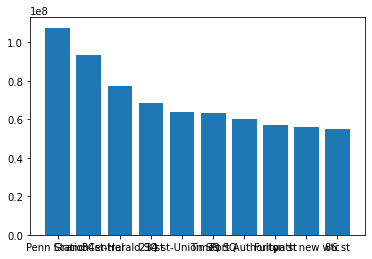

In [35]:
plt.bar(x,y)

In [36]:
color_list = ['pink','mediumslateblue','cyan','mediumturquoise','mediumspringgreen','yellowgreen','gold','orange','tomato','red']

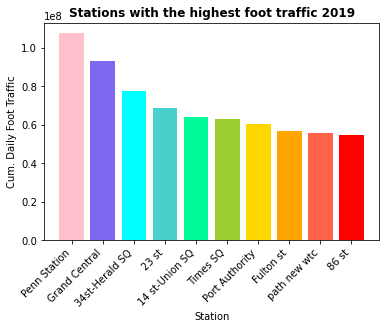

In [37]:
#https://python-graph-gallery.com/191-custom-axis-on-matplotlib-chart

import numpy as np
y_pos = np.arange(len(x))

plt.bar(x,y, color = color_list)
plt.title('Stations with the highest foot traffic 2019',fontweight='bold')
plt.xlabel('Station')
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Cum. Daily Foot Traffic')
plt.savefig('Station_FT_Image');

In [38]:
station_totals.station.nunique()

379

In [39]:
station_totals.station.unique()

array(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST',
       '14 ST-UNION SQ', 'TIMES SQ-42 ST', '42 ST-PORT AUTH', 'FULTON ST',
       'PATH NEW WTC', '86 ST', 'CANAL ST', '125 ST', '59 ST COLUMBUS',
       '59 ST', '47-50 STS ROCK', '14 ST', '96 ST', 'FLUSHING-MAIN',
       '72 ST', 'CHAMBERS ST', '50 ST', 'JKSN HT-ROOSVLT',
       'ATL AV-BARCLAY', 'W 4 ST-WASH SQ', 'JOURNAL SQUARE', '28 ST',
       '42 ST-BRYANT PK', 'WALL ST', 'LEXINGTON AV/53', '7 AV',
       'JAY ST-METROTEC', 'GROVE STREET', '145 ST', 'CHURCH AV',
       'JAMAICA CENTER', '8 AV', '57 ST-7 AV', 'THIRTY THIRD ST',
       '116 ST', 'GRAND ST', "B'WAY-LAFAYETTE", '77 ST', '72 ST-2 AVE',
       'BOROUGH HALL', 'CITY / BUS', 'BOWLING GREEN', 'KINGS HWY',
       'EXCHANGE PLACE', 'DELANCEY/ESSEX', '5 AV/53 ST', '103 ST',
       '66 ST-LINCOLN', '33 ST', 'KEW GARDENS', 'DEKALB AV',
       'PAVONIA/NEWPORT', 'CROWN HTS-UTICA', 'LEXINGTON AV/63',
       '86 ST-2 AVE', 'SPRING ST', 'BEDFORD AV', 'JUNCTIO

In [40]:


station_totals.tail(20)

,station,daily_entries,daily_exits,daily_foot_traffic
359,AVENUE P,750288.0,308034.0,1058322.0
360,BAY 50 ST,838338.0,176574.0,1014912.0
361,55 ST,647711.0,299031.0,946742.0
362,AVENUE I,592046.0,272418.0,864464.0
363,AQUEDUCT N.COND,272828.0,579075.0,851903.0
364,215 ST,558062.0,235969.0,794031.0
365,ATLANTIC AV,497538.0,224466.0,722004.0
366,CYPRESS HILLS,427491.0,266462.0,693953.0
367,E 143/ST MARY'S,321965.0,366832.0,688797.0
368,BEACH 44 ST,288069.0,397328.0,685397.0


In [41]:
new_x = ['Orchard Beach','Beach 105 ST','Tompkinsville','Beach 98 ST','Rockaway Park Beach','Beach 90 ST','E 143/ST Marys','215 ST','Aqueduct N.Cond','55 ST']

In [42]:
new_y = [10969,191777,216086,336421,520065,650107,688797,794031,851903,946742]

In [43]:
color_list_new = ['navajowhite','khaki','darksalmon','lightcoral','palevioletred','orchid','violet','plum','lavender','lightsteelblue']

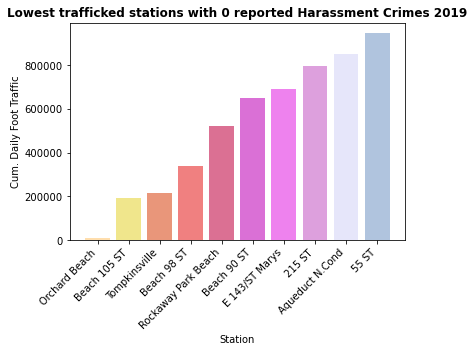

In [44]:
y_pos = np.arange(len(new_x))

plt.bar(new_x,new_y, color = color_list_new)
plt.title('Lowest trafficked stations with 0 reported Harassment Crimes 2019',fontweight='bold')
plt.xlabel('Station')
plt.xticks(y_pos,new_x,rotation = 45,horizontalalignment='right')
plt.ylabel('Cum. Daily Foot Traffic')
plt.savefig('Station_Low_FT_Image');

In [45]:
harassment_df = pd.read_sql('SELECT * FROM mta_harassment_data;',engine)

In [46]:
harassment_df.head(3)

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,report_date,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,transit_district,latitude,longitude,lat_long,patrol_boro,station_name,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,101169135,08/04/2019,17:00:00,,,14,08/05/2019,578,HARRASSMENT 2,638,...,M,1,40.757241,-73.989794,"(40.757240531000036, -73.98979363699993)",PATROL BORO MAN SOUTH,42 ST.-PORT AUTHORITY BUS TERM,18-24,WHITE,F
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,08/23/2019,578,HARRASSMENT 2,638,...,F,30,40.666896,-73.981582,"(40.666895659000026, -73.98158161699997)",PATROL BORO BKLYN SOUTH,7 AVENUE,65+,ASIAN / PACIFIC ISLANDER,F
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,05/01/2019,578,HARRASSMENT 2,638,...,F,23,40.593065,-73.775319,"(40.59306498000007, -73.77531893199995)",PATROL BORO QUEENS SOUTH,BEACH 44 STREET,65+,BLACK,F


In [47]:
harassment_df.drop_duplicates()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,report_date,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,transit_district,latitude,longitude,lat_long,patrol_boro,station_name,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,101169135,08/04/2019,17:00:00,,,14,08/05/2019,578,HARRASSMENT 2,638,...,M,1,40.757241,-73.989794,"(40.757240531000036, -73.98979363699993)",PATROL BORO MAN SOUTH,42 ST.-PORT AUTHORITY BUS TERM,18-24,WHITE,F
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,08/23/2019,578,HARRASSMENT 2,638,...,F,30,40.666896,-73.981582,"(40.666895659000026, -73.98158161699997)",PATROL BORO BKLYN SOUTH,7 AVENUE,65+,ASIAN / PACIFIC ISLANDER,F
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,05/01/2019,578,HARRASSMENT 2,638,...,F,23,40.593065,-73.775319,"(40.59306498000007, -73.77531893199995)",PATROL BORO QUEENS SOUTH,BEACH 44 STREET,65+,BLACK,F
3,104128001,09/17/2019,07:15:00,09/17/2019,07:20:00,107,09/17/2019,578,HARRASSMENT 2,638,...,M,20,40.710718,-73.793041,"(40.710718006000036, -73.79304054299998)",PATROL BORO QUEENS SOUTH,169 STREET,45-64,WHITE HISPANIC,M
4,105170512,06/18/2019,14:25:00,06/18/2019,14:30:00,68,06/18/2019,578,HARRASSMENT 2,637,...,M,34,40.634624,-74.023521,"(40.63462431100004, -74.02352130199995)",PATROL BORO BKLYN SOUTH,BAY RIDGE AVENUE,25-44,WHITE HISPANIC,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,997425814,02/04/2019,09:16:00,02/04/2019,09:30:00,108,02/04/2019,578,HARRASSMENT 2,637,...,M,20,40.743165,-73.918703,"(40.743164671000045, -73.91870263199996)",PATROL BORO QUEENS NORTH,46 STREET,45-64,BLACK HISPANIC,F
1257,998211167,04/08/2019,10:30:00,04/08/2019,11:15:00,1,04/08/2019,578,HARRASSMENT 2,637,...,M,2,40.710229,-74.007746,"(40.71022856800005, -74.00774568899999)",PATROL BORO MAN SOUTH,BROADWAY/NASSAU,UNKNOWN,UNKNOWN,F
1258,998310211,02/10/2019,19:45:00,02/10/2019,20:00:00,90,02/10/2019,578,HARRASSMENT 2,637,...,M,33,40.700734,-73.941933,"(40.700733765000045, -73.94193330699994)",PATROL BORO BKLYN NORTH,FLUSHING AVENUE,18-24,BLACK,F
1259,999499043,07/19/2019,18:50:00,07/19/2019,18:55:00,28,07/19/2019,578,HARRASSMENT 2,637,...,M,3,40.804428,-73.955370,"(40.80442807300005, -73.95537020999996)",PATROL BORO MAN NORTH,116 STREET,<18,BLACK,M


In [48]:
#drop irrelevant columns and clean labels

harassment_df.columns = [column.strip() for column in harassment_df.columns]
harassment_df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'precinct', 'report_date', 'KY_CD', 'OFNS_DESC',
       'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CT_CD', 'borough',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSEING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'transit_district',
       'latitude', 'longitude', 'lat_long', 'patrol_boro', 'station_name',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [49]:
label_names = ['report_date','KY_CD','OFNS_DESC','PD_CD','PD_DESC','CRM_ATPT_CPTD_CD','LAW_CT_CD','borough','LOC_OF_OCCUR_DESC',
               'PREM_TYP_DESC','JURIS_DESC','JURISDICTION_CODE','PARKS_NM','HADEVELOPT','HOUSEING_PSA','X_COORD_CD',
              'Y_COORD_CD','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX','transit_district','latitude','longitude','lat_long','VIC_AGE_GROUP','VIC_RACE','VIC_SEX']

harassment_df.drop(labels= label_names, axis=1, inplace=True)

In [50]:
#Turnstile data has more stations at 379 so not all stations will appear in both sets
harassment_df.station_name.nunique()

285

In [51]:
mta_turnstile_station_names = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST',
       '14 ST-UNION SQ', 'TIMES SQ-42 ST', '42 ST-PORT AUTH', 'FULTON ST',
       'PATH NEW WTC', '86 ST', 'CANAL ST', '125 ST', '59 ST COLUMBUS',
       '59 ST', '47-50 STS ROCK', '14 ST', '96 ST', 'FLUSHING-MAIN',
       '72 ST', 'CHAMBERS ST', '50 ST', 'JKSN HT-ROOSVLT',
       'ATL AV-BARCLAY', 'W 4 ST-WASH SQ', 'JOURNAL SQUARE', '28 ST',
       '42 ST-BRYANT PK', 'WALL ST', 'LEXINGTON AV/53', '7 AV',
       'JAY ST-METROTEC', 'GROVE STREET', '145 ST', 'CHURCH AV',
       'JAMAICA CENTER', '8 AV', '57 ST-7 AV', 'THIRTY THIRD ST',
       '116 ST', 'GRAND ST', "B'WAY-LAFAYETTE", '77 ST', '72 ST-2 AVE',
       'BOROUGH HALL', 'CITY / BUS', 'BOWLING GREEN', 'KINGS HWY',
       'EXCHANGE PLACE', 'DELANCEY/ESSEX', '5 AV/53 ST', '103 ST',
       '66 ST-LINCOLN', '33 ST', 'KEW GARDENS', 'DEKALB AV',
       'PAVONIA/NEWPORT', 'CROWN HTS-UTICA', 'LEXINGTON AV/63',
       '86 ST-2 AVE', 'SPRING ST', 'BEDFORD AV', 'JUNCTION BLVD',
       'SUTPHIN-ARCHER', '161/YANKEE STAD', '49 ST', '181 ST', '51 ST',
       'JFK JAMAICA CT1', 'BROOKLYN BRIDGE', '167 ST', 'NOSTRAND AV',
       '34 ST-HUDSON YD', 'FOREST HILLS 71', 'WOODHAVEN BLVD',
       '68ST-HUNTER CO', 'FRANKLIN AV', 'LACKAWANNA', '1 AV', 'ASTOR PL',
       '61 ST WOODSIDE', '103 ST-CORONA', 'CHRISTOPHER ST',
       'CORTLANDT ST', '2 AV', 'FORDHAM RD', 'NEWARK BM BW',
       '82 ST-JACKSON H', 'WHITEHALL S-FRY', '96 ST-2 AVE', 'THIRTY ST',
       'COURT SQ', 'WORLD TRADE CTR', 'PARKCHESTER', 'NEWARK HM HE',
       'CATHEDRAL PKWY', '36 ST', 'ASTORIA DITMARS', 'HARRISON',
       '3 AV-149 ST', 'SOUTH FERRY', '8 ST-NYU', 'MYRTLE-WYCKOFF',
       '30 AV', 'FLATBUSH AV-B.C', '79 ST', 'GRAND-NEWTOWN', '135 ST',
       'BROADWAY', 'UTICA AV', '168 ST', 'CONEY IS-STILLW',
       'JAMAICA 179 ST', '57 ST', '5 AVE', 'PRINCE ST', '170 ST',
       'QUEENS PLAZA', '14TH STREET', 'KINGSBRIDGE RD', '5 AV/59 ST',
       'SHEEPSHEAD BAY', 'WTC-CORTLANDT', 'TWENTY THIRD ST', 'MARCY AV',
       'STEINWAY ST', 'BAY PKWY', 'CLINTON-WASH AV', 'BERGEN ST',
       'RECTOR ST', 'HOUSTON ST', '111 ST', 'VERNON-JACKSON',
       '81 ST-MUSEUM', 'BEDFORD PK BLVD', 'HIGH ST', 'BLEECKER ST',
       '90 ST-ELMHURST', 'NASSAU AV', 'PATH WTC 2', 'METROPOLITAN AV',
       'GUN HILL RD', '46 ST BLISS ST', '137 ST CITY COL',
       'FT HAMILTON PKY', '9TH STREET', 'FLUSHING AV', '18 AV',
       'PROSPECT AV', 'HOYT-SCHER', 'EAST BROADWAY', 'HALSEY ST',
       'NEWARK HW BMEBE', '116 ST-COLUMBIA', '63 DR-REGO PARK',
       'QUEENSBORO PLZ', 'BRIGHTON BEACH', '149/GRAND CONC',
       'CANARSIE-ROCKAW', '175 ST', 'BURNSIDE AV', 'PROSPECT PARK',
       'GREENPOINT AV', '157 ST', 'NEWKIRK PLAZA', '110 ST', 'NEVINS ST',
       'MYRTLE AV', 'ROCKAWAY AV', 'ELMHURST AV', '40 ST LOWERY ST',
       '21 ST-QNSBRIDGE', 'HUNTS POINT AV', 'YORK ST', 'AVENUE U',
       'PELHAM PKWY', '53 ST', 'BROADWAY JCT', 'DYCKMAN ST', 'NEWARK C',
       'CARROLL ST', '33 ST-RAWSON ST', 'CENTRAL PK N110', 'TREMONT AV',
       '18 ST', '4AV-9 ST', 'LORIMER ST', '46 ST', '191 ST',
       'NORWOOD 205 ST', 'INWOOD-207 ST', 'EUCLID AV', '169 ST',
       'HOWARD BCH JFK', '3 AV 138 ST', 'ROOSEVELT ISLND',
       'METS-WILLETS PT', 'GRAHAM AV', 'BEDFORD-NOSTRAN', '231 ST',
       'PARSONS BLVD', 'E 180 ST', 'HOYT ST', 'SUTTER AV-RUTLD', '52 ST',
       'BAY RIDGE AV', '36 AV', '174 ST', 'KINGSTON-THROOP',
       'OZONE PK LEFFRT', 'FAR ROCKAWAY', 'CASTLE HILL AV', 'ELDER AV',
       'UNION ST', '67 AV', 'ROCKAWAY BLVD', '45 ST', 'CLASSON AV',
       '20 AV', 'KNICKERBOCKER', 'PELHAM BAY PARK', 'ST. GEORGE',
       'NORTHERN BLVD', 'MORISN AV/SNDVW', 'HUNTERS PT AV', 'MORGAN AV',
       'FRESH POND RD', 'NEWKIRK AV', 'MOSHOLU PKWY', 'WEST FARMS SQ',
       'BROOK AV', '15 ST-PROSPECT', 'NEW LOTS AV', 'WESTCHESTER SQ',
       'SIMPSON ST', '3 AV', 'VAN SICLEN AV', '9 AV', '155 ST',
       'PARKSIDE AV', 'GRANT AV', 'JEFFERSON ST', 'EASTN PKWY-MUSM',
       'BROAD ST', 'SARATOGA AV', 'SMITH-9 ST', 'CITY HALL', 'GATES AV',
       '69 ST', 'V.CORTLANDT PK', 'GRAND ARMY PLAZ', '207 ST',
       'WAKEFIELD/241', 'AVENUE H', 'MONTROSE AV', 'JAMAICA VAN WK',
       'FRANKLIN ST', 'CRESCENT ST', 'AVENUE J', 'E 149 ST',
       'BAY RIDGE-95 ST', 'CENTRAL AV', 'MYRTLE-WILLOUGH', 'CLARK ST',
       'NEW UTRECHT AV', 'RALPH AV', 'PARK PLACE', '183 ST',
       'STERLING ST', 'EASTCHSTER/DYRE', 'KINGSTON AV', '176 ST',
       '4 AV-9 ST', 'WOODLAWN', '74 ST-BROADWAY', 'NEW LOTS', 'NECK RD',
       'MT EDEN AV', 'FREEMAN ST', '163 ST-AMSTERDM', 'BOWERY',
       'CORTELYOU RD', 'COURT SQ-23 ST', 'ST LAWRENCE AV', 'WILSON AV',
       'AVENUE M', '6 AV', 'KOSCIUSZKO ST', '174-175 STS', 'SUTPHIN BLVD',
       '71 ST', 'FOREST AVE', 'WINTHROP ST', 'ALLERTON AV', 'BRIARWOOD',
       'LAFAYETTE AV', 'HARLEM 148 ST', 'BUHRE AV', 'PRESIDENT ST',
       'SENECA AVE', '25 ST', 'PENNSYLVANIA AV', '182-183 STS',
       'EAST 105 ST', 'BEVERLEY ROAD', '190 ST', '80 ST', 'INTERVALE AV',
       'SHEPHERD AV', 'HEWES ST', 'MARBLE HILL-225', 'NORWOOD AV',
       '138/GRAND CONC', '104 ST', '233 ST', 'JACKSON AV', '65 ST',
       '25 AV', 'SUTTER AV', 'VAN SICLEN AVE', 'CYPRESS AV',
       'CLEVELAND ST', '225 ST', 'OCEAN PKWY', 'DITMAS AV',
       '75 ST-ELDERTS', 'LONGWOOD AV', 'RIT-MANHATTAN', 'CHAUNCEY ST',
       '85 ST-FOREST PK', 'LIVONIA AV', 'BOTANIC GARDEN', '121 ST',
       '39 AV', 'BEVERLY RD', 'ZEREGA AV', 'JUNIUS ST', 'W 8 ST-AQUARIUM',
       '219 ST', 'BURKE AV', 'NEREID AV', 'MORRIS PARK', '75 AV',
       '238 ST', 'ALABAMA AV', 'BAYCHESTER AV', 'ASTORIA BLVD',
       'BEACH 67 ST', 'LIBERTY AV', 'AVENUE X', 'AVENUE N', 'WHITLOCK AV',
       '88 ST', 'MIDDLETOWN RD', 'RIT-ROOSEVELT', 'BEACH 25 ST', '21 ST',
       'BEACH 60 ST', 'BRONX PARK EAST', 'BUSHWICK AV', 'AVENUE P',
       'BAY 50 ST', '55 ST', 'AVENUE I', 'AQUEDUCT N.COND', '215 ST',
       'ATLANTIC AV', 'CYPRESS HILLS', "E 143/ST MARY'S", 'BEACH 44 ST',
       'AQUEDUCT RACETR', 'BEACH 90 ST', 'BEACH 36 ST', 'NEPTUNE AV',
       'ROCKAWAY PARK B', 'BEACH 98 ST', 'TOMPKINSVILLE', 'BEACH 105 ST',
       'BROAD CHANNEL', 'ORCHARD BEACH']

In [52]:
harassment_df.head(2)

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name
0,101169135,08/04/2019,17:00:00,,,14,PATROL BORO MAN SOUTH,42 ST.-PORT AUTHORITY BUS TERM
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,PATROL BORO BKLYN SOUTH,7 AVENUE


In [53]:
harassment_data_station_names = list(harassment_df.station_name.unique())

In [54]:


#How many station names in common do we already have?
shared_name = []
unique_names = []
for station in mta_turnstile_station_names:
    if station in harassment_data_station_names:
        shared_name.append(station)
    else:
        unique_names.append(station)

In [55]:
names_to_change =[]
for station in harassment_data_station_names:
    if station not in shared_name:
        names_to_change.append(station)
        
len(names_to_change)

266

In [56]:
shared_name

['BOROUGH HALL',
 'BOWLING GREEN',
 'SOUTH FERRY',
 'BROADWAY',
 'QUEENS PLAZA',
 'SHEEPSHEAD BAY',
 '9TH STREET',
 'EAST BROADWAY',
 'BRIGHTON BEACH',
 'PROSPECT PARK',
 'PELHAM BAY PARK',
 'PARK PLACE',
 'BOWERY',
 'BEVERLEY ROAD',
 'OCEAN PKWY',
 'BOTANIC GARDEN',
 'BRONX PARK EAST',
 'CYPRESS HILLS',
 'BROAD CHANNEL']

In [57]:
#https://stackoverflow.com/questions/53512801/python-replace-st-with-street-but-leave-street-name-the-same
#Change Harassment data station names to more closely match patterns in mta turnstile data station names

import re

def string_replacement(station_list):
    new_stations_list =[]
    for station in station_list:
        if 'STREET'in station:
            station = re.sub(r"\b" + 'STREET' + r"\b", 'ST', station)
            new_stations_list.append(station)
        elif 'AVENUE' in station:
            station = re.sub(r"\b" + 'AVENUE' + r"\b", 'AV', station)
            new_stations_list.append(station)
        elif 'SQUARE' in station:
            station = re.sub(r"\b" + 'SQUARE' + r"\b", 'SQ', station)
            new_stations_list.append(station)
        else:
            new_stations_list.append(station)
    return new_stations_list

In [58]:
updated_HD_station_names = string_replacement(harassment_data_station_names)

In [59]:
len(updated_HD_station_names)

285

In [60]:
shared_names_1 = []
unique_names_1 = []
for station in mta_turnstile_station_names:
    if station in updated_HD_station_names:
        shared_names_1.append(station)
    else:
        unique_names_1.append(station)

In [61]:
#went from 19 shared sation names to 156
len(shared_names_1)

156

In [62]:
len(unique_names_1)

223

In [63]:
#lets apply this change to the dataframe

names_dict = {}
count = -1
for i in harassment_data_station_names:
    count +=1
    names_dict[i] = updated_HD_station_names[count]
    

In [64]:
# check and compare that it worked
harassment_df.head(5)

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name
0,101169135,08/04/2019,17:00:00,,,14,PATROL BORO MAN SOUTH,42 ST.-PORT AUTHORITY BUS TERM
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,PATROL BORO BKLYN SOUTH,7 AVENUE
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,PATROL BORO QUEENS SOUTH,BEACH 44 STREET
3,104128001,09/17/2019,07:15:00,09/17/2019,07:20:00,107,PATROL BORO QUEENS SOUTH,169 STREET
4,105170512,06/18/2019,14:25:00,06/18/2019,14:30:00,68,PATROL BORO BKLYN SOUTH,BAY RIDGE AVENUE


In [65]:

# check and compare that it worked - harassment_df.tail(5)

harassment_df['station_name'] = harassment_df.station_name.map(names_dict)

In [66]:
harassment_df.head(5)

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name
0,101169135,08/04/2019,17:00:00,,,14,PATROL BORO MAN SOUTH,42 ST.-PORT AUTHORITY BUS TERM
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,PATROL BORO BKLYN SOUTH,7 AV
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,PATROL BORO QUEENS SOUTH,BEACH 44 ST
3,104128001,09/17/2019,07:15:00,09/17/2019,07:20:00,107,PATROL BORO QUEENS SOUTH,169 ST
4,105170512,06/18/2019,14:25:00,06/18/2019,14:30:00,68,PATROL BORO BKLYN SOUTH,BAY RIDGE AV


In [67]:
# check and compare that it worked - harassment_df.tail(5)

!pip install fuzzywuzzy
!pip install python-Levenshtein

In [68]:
#Let's handle the other 129 names that don't match

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [69]:
need_to_match = []
for station in updated_HD_station_names:
    if station not in shared_names_1:
        need_to_match.append(station)

In [70]:
len(need_to_match)

129

In [71]:
#https://towardsdatascience.com/string-matching-with-fuzzywuzzy-e982c61f8a84
#https://medium.com/analytics-vidhya/matching-messy-pandas-columns-with-fuzzywuzzy-4adda6c7994f

process.extractOne('42 ST.-TIMES SQ',mta_turnstile_station_names,scorer=fuzz.token_sort_ratio)

('TIMES SQ-42 ST', 100)

In [72]:
def get_score(list_1,list_2):
    score_dict = {}
    for i in list_1:
        score = process.extractOne(i,list_2,scorer=fuzz.token_sort_ratio)
        score_dict[i] = score
    return score_dict
        

In [73]:

score_dict = get_score(need_to_match,mta_turnstile_station_names)

In [74]:
high_match = {}
low_match = {}
for name in score_dict:
    token_score = score_dict[name]
    if token_score[1] > 85:
        high_match[name] = token_score
    else:
        low_match[name] = token_score


In [75]:
print(len(high_match))
print(len(low_match))

48
81


In [76]:
#only one bad match
high_match

{'205 ST.-NORWOOD': ('NORWOOD 205 ST', 100),
 'UNION SQ': ('UNION ST', 88),
 '42 ST.-TIMES SQ': ('TIMES SQ-42 ST', 100),
 '207 ST.-INWOOD': ('INWOOD-207 ST', 100),
 '14 ST.-UNION SQ': ('14 ST-UNION SQ', 100),
 '34 ST.-HERALD SQ.': ('34 ST-HERALD SQ', 100),
 '34 ST.-PENN STATION': ('34 ST-PENN STA', 88),
 '42 ST.-GRAND CENTRAL': ('GRD CNTRL-42 ST', 88),
 'PELHAM PKWY.': ('PELHAM PKWY', 100),
 'COURT ST': ('COURT SQ', 88),
 'PARSONS BLVD.': ('PARSONS BLVD', 100),
 '74 ST.-BROADWAY': ('74 ST-BROADWAY', 100),
 '137 ST.-CITY COLLEGE': ('137 ST CITY COL', 88),
 'GRAND ARMY PLAZA': ('GRAND ARMY PLAZ', 97),
 'GUN HILL ROAD': ('GUN HILL RD', 92),
 '61 ST.-WOODSIDE': ('61 ST WOODSIDE', 100),
 'QUEENSBORO PLAZA': ('QUEENSBORO PLZ', 93),
 'BEDFORD PK. BLVD.': ('BEDFORD PK BLVD', 100),
 'CORTELYOU ROAD': ('CORTELYOU RD', 92),
 'EAST 180 ST': ('EAST 105 ST', 91),
 'JUNCTION BLVD.': ('JUNCTION BLVD', 100),
 'ELMHURST AVE.': ('ELMHURST AV', 96),
 'LEXINGTON AVE.': ('LEXINGTON AV/53', 86),
 'LEXINGTON 

In [77]:
low_match 

{'42 ST.-PORT AUTHORITY BUS TERM': ('42 ST-PORT AUTH', 68),
 'BROADWAY/NASSAU': ('EAST BROADWAY', 79),
 '168 ST.-WASHINGTON HTS.': ('14 ST-UNION SQ', 57),
 'ROOSEVELT AVE.-JACKSON HEIGHTS': ('JKSN HT-ROOSVLT', 68),
 'BAY PARKWAY': ('BAY PKWY', 84),
 'MYRTLE/WYCKOFF AVENUES': ('MYRTLE-WYCKOFF', 78),
 '116 ST.-COLUMBIA UNIVERSITY': ('116 ST-COLUMBIA', 73),
 'HOYT-SCHERMERHORN': ('HOYT-SCHER', 74),
 '110 ST.-CATHEDRAL PKWY.': ('CATHEDRAL PKWY', 80),
 'WHITEHALL ST.-SOUTH FERRY': ('WHITEHALL S-FRY', 77),
 '42 ST': ('23 ST', 80),
 'EAST 174 ST': ('EAST 105 ST', 82),
 '81 ST.-MUSEUM OF NATURAL HISTO': ('81 ST-MUSEUM', 59),
 'KINGS HIGHWAY': ('KINGS HWY', 82),
 'LEFFERTS BLVD.': ('PARSONS BLVD', 56),
 'UTICA AVE.-CROWN HEIGHTS': ('CROWN HTS-UTICA', 79),
 'ESSEX ST': ('CRESCENT ST', 63),
 'STILLWELL AV-CONEY ISLAND': ('CONEY IS-STILLW', 75),
 '59 ST.-COLUMBUS CIRCLE': ('59 ST COLUMBUS', 80),
 'BROADWAY-EAST NEW YORK': ('EAST BROADWAY', 74),
 'PARSONS/ARCHER-JAMAICA CENTER': ('JAMAICA CENTER', 

In [78]:
#Let's fix these (sorted the list of all stations to look for proper match cross-ref with googlemaps where necessary):
#string matching would not catch '62 ST' == 'NEW UTRECHT AV'

score_dict['EAST 180 ST'] = ('E 180 ST', 0)
score_dict['42 ST'] = ('42 ST-BRYANT PK', 0)
score_dict['EAST 174 ST'] = ('174 ST', 0)
score_dict['AV "I"'] = ('AVENUE I', 0)
score_dict['AV "M"'] = ('AVENUE M', 0)
score_dict['W. 4 ST'] = ('W 4 ST-WASH SQ', 0)
score_dict['168 ST.-WASHINGTON HTS.'] = ('168 ST', 0)
score_dict['BROADWAY-EASTERN PKWY'] = ('BROADWAY JCT', 0)
score_dict['BROADWAY-EAST NEW YORK'] = ('EAST BROADWAY', 0)
score_dict['BROADWAY/NASSAU'] = ('BROADWAY', 0)
score_dict['168 ST.-WASHINGTON HTS.'] = ('168 ST', 0)
score_dict['ESSEX ST'] = ('DELANCEY/ESSEX', 0)
score_dict['DISTRICT 33 OFFICE'] = ('Not Specified', 0)
score_dict['PACIFIC ST'] = ('ATL AV-BARCLAY', 0)
score_dict['AV "U"'] = ('AVENUE U', 0)
score_dict['34 ST'] = ('34 ST-HUDSON YD', 0)
score_dict['SOUNDVIEW AV'] = ('MORISN AV/SNDVW', 0)
score_dict['40 ST'] = ('40 ST LOWERY ST', 0)
score_dict[''] = ('Not Specified', 0)
score_dict['LEFFERTS BLVD.'] = ('OZONE PK LEFFRT', 0)
score_dict['DELANCEY ST'] = ('DELANCEY/ESSEX', 0)
score_dict['102 ST'] = ('103 ST-CORONA', 0)
score_dict['62 ST'] = ('NEW UTRECHT AV', 0)
score_dict['DISTRICT 1 OFFICE'] = ('Not Specified', 0)

#Not specified used for stations that were masked due to sensitive victim info in oringinal dataset

In [79]:


score_dict

{'42 ST.-PORT AUTHORITY BUS TERM': ('42 ST-PORT AUTH', 68),
 'BROADWAY/NASSAU': ('BROADWAY', 0),
 '168 ST.-WASHINGTON HTS.': ('168 ST', 0),
 '205 ST.-NORWOOD': ('NORWOOD 205 ST', 100),
 'ROOSEVELT AVE.-JACKSON HEIGHTS': ('JKSN HT-ROOSVLT', 68),
 'UNION SQ': ('UNION ST', 88),
 '42 ST.-TIMES SQ': ('TIMES SQ-42 ST', 100),
 '207 ST.-INWOOD': ('INWOOD-207 ST', 100),
 'BAY PARKWAY': ('BAY PKWY', 84),
 'MYRTLE/WYCKOFF AVENUES': ('MYRTLE-WYCKOFF', 78),
 '116 ST.-COLUMBIA UNIVERSITY': ('116 ST-COLUMBIA', 73),
 'HOYT-SCHERMERHORN': ('HOYT-SCHER', 74),
 '110 ST.-CATHEDRAL PKWY.': ('CATHEDRAL PKWY', 80),
 'WHITEHALL ST.-SOUTH FERRY': ('WHITEHALL S-FRY', 77),
 '14 ST.-UNION SQ': ('14 ST-UNION SQ', 100),
 '34 ST.-HERALD SQ.': ('34 ST-HERALD SQ', 100),
 '42 ST': ('42 ST-BRYANT PK', 0),
 'EAST 174 ST': ('174 ST', 0),
 '34 ST.-PENN STATION': ('34 ST-PENN STA', 88),
 '42 ST.-GRAND CENTRAL': ('GRD CNTRL-42 ST', 88),
 '81 ST.-MUSEUM OF NATURAL HISTO': ('81 ST-MUSEUM', 59),
 'KINGS HIGHWAY': ('KINGS HWY', 

In [80]:
len(score_dict)

129

In [81]:
score_dict['FRESH POND ROAD'][0]

'FRESH POND RD'

In [82]:
#Let's update the dataframe 

final_score_dict = {}
for station in score_dict:
    new_station = score_dict[station][0]
    final_score_dict[station] = new_station
final_score_dict    


{'42 ST.-PORT AUTHORITY BUS TERM': '42 ST-PORT AUTH',
 'BROADWAY/NASSAU': 'BROADWAY',
 '168 ST.-WASHINGTON HTS.': '168 ST',
 '205 ST.-NORWOOD': 'NORWOOD 205 ST',
 'ROOSEVELT AVE.-JACKSON HEIGHTS': 'JKSN HT-ROOSVLT',
 'UNION SQ': 'UNION ST',
 '42 ST.-TIMES SQ': 'TIMES SQ-42 ST',
 '207 ST.-INWOOD': 'INWOOD-207 ST',
 'BAY PARKWAY': 'BAY PKWY',
 'MYRTLE/WYCKOFF AVENUES': 'MYRTLE-WYCKOFF',
 '116 ST.-COLUMBIA UNIVERSITY': '116 ST-COLUMBIA',
 'HOYT-SCHERMERHORN': 'HOYT-SCHER',
 '110 ST.-CATHEDRAL PKWY.': 'CATHEDRAL PKWY',
 'WHITEHALL ST.-SOUTH FERRY': 'WHITEHALL S-FRY',
 '14 ST.-UNION SQ': '14 ST-UNION SQ',
 '34 ST.-HERALD SQ.': '34 ST-HERALD SQ',
 '42 ST': '42 ST-BRYANT PK',
 'EAST 174 ST': '174 ST',
 '34 ST.-PENN STATION': '34 ST-PENN STA',
 '42 ST.-GRAND CENTRAL': 'GRD CNTRL-42 ST',
 '81 ST.-MUSEUM OF NATURAL HISTO': '81 ST-MUSEUM',
 'KINGS HIGHWAY': 'KINGS HWY',
 'LEFFERTS BLVD.': 'OZONE PK LEFFRT',
 'UTICA AVE.-CROWN HEIGHTS': 'CROWN HTS-UTICA',
 'ESSEX ST': 'DELANCEY/ESSEX',
 'STILLWELL

In [83]:
final_score_dict['42 ST.-TIMES SQ']

'TIMES SQ-42 ST'

In [84]:
#Let's update the dataframe 
stations_final_list = []
for station in harassment_df.station_name:
    if station in final_score_dict:
        final_station = final_score_dict[station]
        stations_final_list.append(final_station)
    else:
        final_station = station
        stations_final_list.append(final_station)
        
len(stations_final_list)

1261

In [85]:
harassment_df['station_name'] = stations_final_list

In [86]:
harassment_df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name
0,101169135,08/04/2019,17:00:00,,,14,PATROL BORO MAN SOUTH,42 ST-PORT AUTH
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,PATROL BORO BKLYN SOUTH,7 AV
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,PATROL BORO QUEENS SOUTH,BEACH 44 ST
3,104128001,09/17/2019,07:15:00,09/17/2019,07:20:00,107,PATROL BORO QUEENS SOUTH,169 ST
4,105170512,06/18/2019,14:25:00,06/18/2019,14:30:00,68,PATROL BORO BKLYN SOUTH,BAY RIDGE AV


In [87]:
harassment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cmplnt_num    1261 non-null   int64 
 1   cmplnt_fr_dt  1261 non-null   object
 2   cmplnt_fr_tm  1261 non-null   object
 3   cmplnt_to_dt  1261 non-null   object
 4   cmplnt_to_tm  1261 non-null   object
 5   precinct      1261 non-null   object
 6   patrol_boro   1261 non-null   object
 7   station_name  1261 non-null   object
dtypes: int64(1), object(7)
memory usage: 78.9+ KB


In [88]:
harassment_df[harassment_df['cmplnt_fr_dt'] == harassment_df['cmplnt_to_dt']]

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,PATROL BORO BKLYN SOUTH,7 AV
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,PATROL BORO QUEENS SOUTH,BEACH 44 ST
3,104128001,09/17/2019,07:15:00,09/17/2019,07:20:00,107,PATROL BORO QUEENS SOUTH,169 ST
4,105170512,06/18/2019,14:25:00,06/18/2019,14:30:00,68,PATROL BORO BKLYN SOUTH,BAY RIDGE AV
5,106237182,03/02/2019,15:05:00,03/02/2019,15:06:00,81,PATROL BORO BKLYN NORTH,UTICA AV
...,...,...,...,...,...,...,...,...
1256,997425814,02/04/2019,09:16:00,02/04/2019,09:30:00,108,PATROL BORO QUEENS NORTH,46 ST
1257,998211167,04/08/2019,10:30:00,04/08/2019,11:15:00,1,PATROL BORO MAN SOUTH,BROADWAY
1258,998310211,02/10/2019,19:45:00,02/10/2019,20:00:00,90,PATROL BORO BKLYN NORTH,FLUSHING AV
1259,999499043,07/19/2019,18:50:00,07/19/2019,18:55:00,28,PATROL BORO MAN NORTH,116 ST


In [89]:
cmplt_invest = harassment_df[harassment_df['cmplnt_fr_dt'] != harassment_df['cmplnt_to_dt']]

cmplt_invest.head(50)

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name
0,101169135,08/04/2019,17:00:00,,,14,PATROL BORO MAN SOUTH,42 ST-PORT AUTH
10,110074668,03/19/2019,15:40:00,,,25,PATROL BORO MAN NORTH,125 ST
18,113141076,09/01/2019,10:00:00,,,20,PATROL BORO MAN NORTH,72 ST
37,128304881,09/15/2019,02:00:00,10/05/2019,12:00:00,26,PATROL BORO MAN NORTH,CATHEDRAL PKWY
39,129819646,08/06/2019,11:50:00,,,1,PATROL BORO MAN SOUTH,WHITEHALL S-FRY
43,131868355,05/28/2019,04:30:00,,,14,PATROL BORO MAN SOUTH,42 ST-BRYANT PK
45,135225155,01/16/2019,11:03:00,,,42,PATROL BORO BRONX,174 ST
61,145585342,02/01/2019,12:15:00,,,40,PATROL BORO BRONX,PROSPECT AV
69,153476756,07/31/2019,14:11:00,,,18,PATROL BORO MAN SOUTH,59 ST COLUMBUS
106,178875266,10/28/2019,16:00:00,,,13,PATROL BORO MAN SOUTH,23 ST


In [90]:
x = harassment_df[harassment_df['cmplnt_num'] == 295660305]

In [91]:
x.cmplnt_to_dt.dtype

dtype('O')

In [92]:
x.cmplnt_to_dt

278    
Name: cmplnt_to_dt, dtype: object

In [93]:
#let's convert to datetime
harassment_df["cmplnt_fr_date_time"] = pd.to_datetime(harassment_df.cmplnt_fr_dt + " " + harassment_df.cmplnt_fr_tm, 
                                            format="%m/%d/%Y %H:%M:%S")

In [94]:
harassment_df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name,cmplnt_fr_date_time
0,101169135,08/04/2019,17:00:00,,,14,PATROL BORO MAN SOUTH,42 ST-PORT AUTH,2019-08-04 17:00:00
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,PATROL BORO BKLYN SOUTH,7 AV,2019-08-23 07:58:00
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,PATROL BORO QUEENS SOUTH,BEACH 44 ST,2019-05-01 06:30:00
3,104128001,09/17/2019,07:15:00,09/17/2019,07:20:00,107,PATROL BORO QUEENS SOUTH,169 ST,2019-09-17 07:15:00
4,105170512,06/18/2019,14:25:00,06/18/2019,14:30:00,68,PATROL BORO BKLYN SOUTH,BAY RIDGE AV,2019-06-18 14:25:00


In [95]:
harassment_df[harassment_df.cmplnt_fr_date_time.isnull() == False]

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name,cmplnt_fr_date_time
0,101169135,08/04/2019,17:00:00,,,14,PATROL BORO MAN SOUTH,42 ST-PORT AUTH,2019-08-04 17:00:00
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,PATROL BORO BKLYN SOUTH,7 AV,2019-08-23 07:58:00
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,PATROL BORO QUEENS SOUTH,BEACH 44 ST,2019-05-01 06:30:00
3,104128001,09/17/2019,07:15:00,09/17/2019,07:20:00,107,PATROL BORO QUEENS SOUTH,169 ST,2019-09-17 07:15:00
4,105170512,06/18/2019,14:25:00,06/18/2019,14:30:00,68,PATROL BORO BKLYN SOUTH,BAY RIDGE AV,2019-06-18 14:25:00
...,...,...,...,...,...,...,...,...,...
1256,997425814,02/04/2019,09:16:00,02/04/2019,09:30:00,108,PATROL BORO QUEENS NORTH,46 ST,2019-02-04 09:16:00
1257,998211167,04/08/2019,10:30:00,04/08/2019,11:15:00,1,PATROL BORO MAN SOUTH,BROADWAY,2019-04-08 10:30:00
1258,998310211,02/10/2019,19:45:00,02/10/2019,20:00:00,90,PATROL BORO BKLYN NORTH,FLUSHING AV,2019-02-10 19:45:00
1259,999499043,07/19/2019,18:50:00,07/19/2019,18:55:00,28,PATROL BORO MAN NORTH,116 ST,2019-07-19 18:50:00


In [96]:
highest_crime = harassment_df.groupby('station_name').count()
highest_crime.sort_values('cmplnt_num',ascending = False,inplace=True)
highest_crime.cmplnt_num.head(20)

station_name
14 ST              41
125 ST             36
TIMES SQ-42 ST     32
BOROUGH HALL       26
GRD CNTRL-42 ST    24
96 ST              23
59 ST COLUMBUS     22
W 4 ST-WASH SQ     20
ATLANTIC AV        19
59 ST              19
FULTON ST          18
42 ST-PORT AUTH    17
34 ST-PENN STA     17
14 ST-UNION SQ     16
UNION ST           15
161/YANKEE STAD    15
DEKALB AV          15
WORLD TRADE CTR    15
CROWN HTS-UTICA    14
CANAL ST           14
Name: cmplnt_num, dtype: int64

In [97]:
highest_crime.head()


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,cmplnt_fr_date_time
station_name,,,,,,,,
14 ST,41,41,41,41,41,41,41,41
125 ST,36,36,36,36,36,36,36,36
TIMES SQ-42 ST,32,32,32,32,32,32,32,32
BOROUGH HALL,26,26,26,26,26,26,26,26
GRD CNTRL-42 ST,24,24,24,24,24,24,24,24


In [98]:
highest_crime.reset_index(inplace=True)

In [99]:
highest_crime.cmplnt_num.mean()

4.705223880597015

In [100]:
comparison_list = highest_crime.station_name.unique()

In [101]:
len(comparison_list)

268

In [102]:
my_list = list(harassment_df['station_name'])

for i in my_list:
    if i not in comparison_list:
        print(i)
    else:
        pass

In [103]:
len(highest_crime)

268

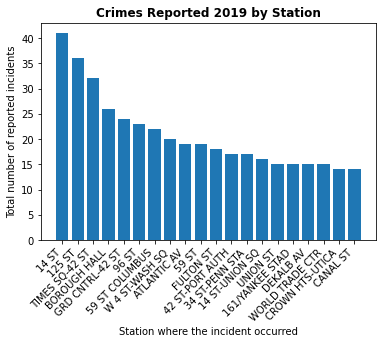

In [104]:
import numpy as np
import matplotlib.pyplot as plt

x = list(highest_crime.station_name.head(20))
y = list(highest_crime.cmplnt_num.head(20))

y_pos = np.arange(len(x))

plt.bar(x,y)
plt.title('Crimes Reported 2019 by Station',fontweight='bold')
plt.xlabel('Station where the incident occurred')
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total number of reported incidents')
plt.savefig('Crimes_by_station');

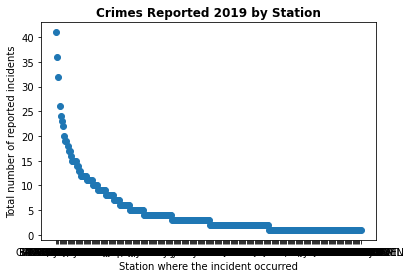

In [105]:
x = list(highest_crime.station_name)
y = list(highest_crime.cmplnt_num)

y_pos = np.arange(len(x))

plt.scatter(x,y)
plt.title('Crimes Reported 2019 by Station',fontweight='bold')
plt.xlabel('Station where the incident occurred')
plt.ylabel('Total number of reported incidents')
plt.savefig('crimes_by_station_2');

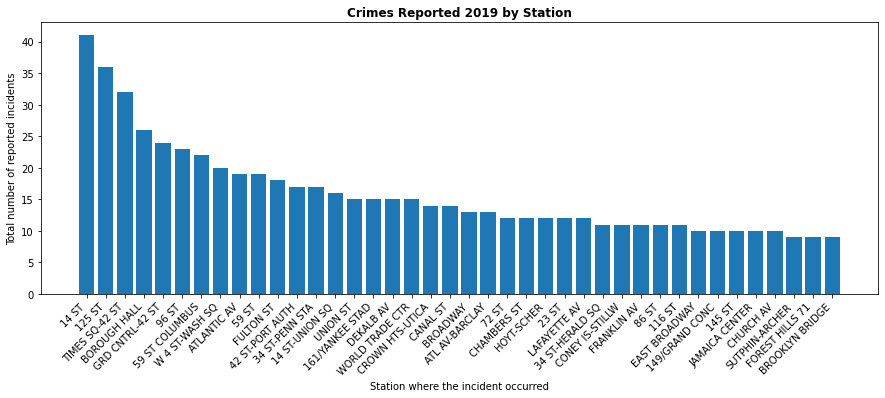

In [106]:
x = list(highest_crime.station_name.head(40))
y = list(highest_crime.cmplnt_num.head(40))

y_pos = np.arange(len(x))

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.title('Crimes Reported 2019 by Station',fontweight='bold')
plt.xlabel('Station where the incident occurred')
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total number of reported incidents')
plt.savefig('crimes_by_station_3');

Text(0.5, 1.0, '# of crimes reported over 2019 per station')

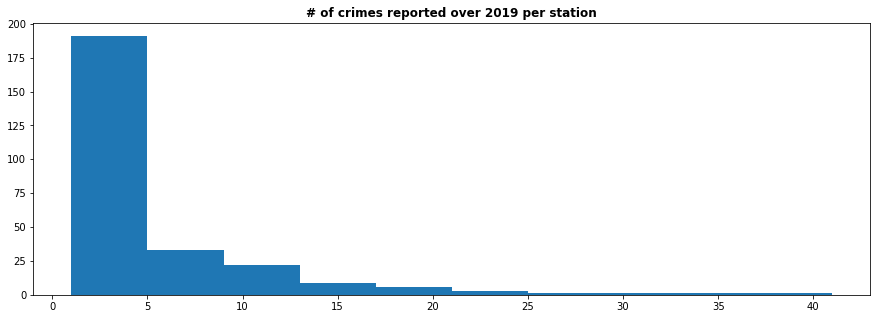

In [107]:
x = list(highest_crime.cmplnt_num)

plt.figure(figsize=(15,5))
plt.hist(x)
plt.title('# of crimes reported over 2019 per station',fontweight='bold')

<AxesSubplot:xlabel='cmplnt_num', ylabel='Count'>

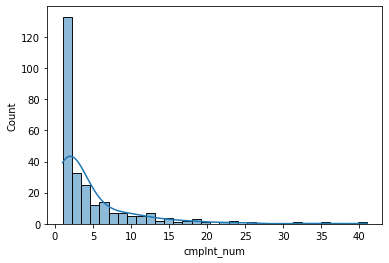

In [108]:
import seaborn as sns

sns.histplot(highest_crime['cmplnt_num'],kde=True)

<AxesSubplot:xlabel='cmplnt_num'>

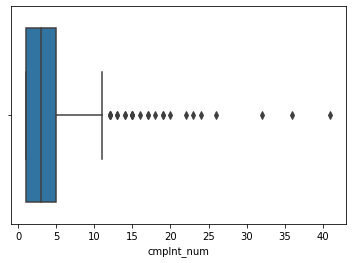

In [109]:
sns.boxplot(x = 'cmplnt_num', data = highest_crime)
plt.savefig('crime_report_boxplot');

Half the data is between 1 and 5 complaints per station (keep in mind the raw data excludes stations with 0 harassment crimes reported) for the year 2019 the average seems to be slightly skewed by the outliers:

Rounded average is now 3 crimes per station in 2019 versus 5 when outliers are present

In [110]:
#Complaints per stations with largest outliers removed
sns.boxplot(x = 'cmplnt_num', data = test_var)

NameError: name 'test_var' is not defined

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


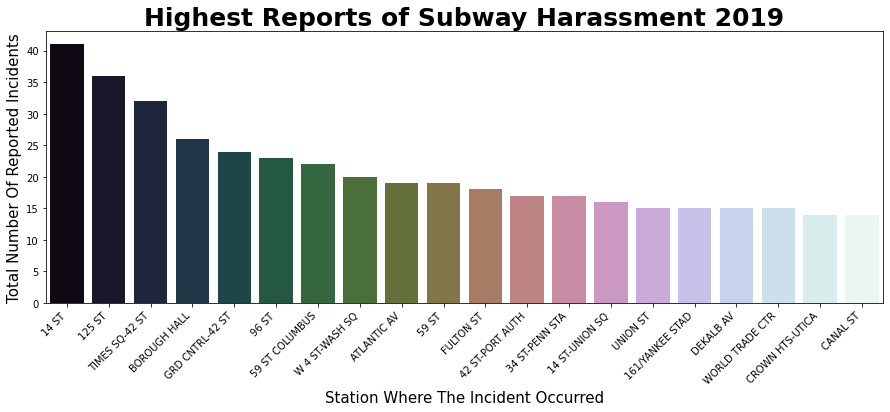

In [118]:
xx = highest_crime[highest_crime['cmplnt_num'] >= 8]

x = list(xx.station_name.head(20))
y = list(xx.cmplnt_num.head(20))

y_pos = np.arange(len(x))

plt.figure(figsize=(15,5))
sns.barplot(x,y, palette = 'cubehelix')
plt.title('Highest Reports of Subway Harassment 2019',fontweight='bold', fontsize = 25)
plt.xlabel('Station Where The Incident Occurred',fontsize = 15)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total Number Of Reported Incidents', fontsize = 15);

In [112]:
months = list(harassment_df['cmplnt_fr_date_time'].dt.month)
months_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
               6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [113]:
grouped_data = harassment_df.copy()
grouped_data['month'] = months
grouped_data['month'] = grouped_data.month.map(months_dict)

In [ ]:
grouped_data.sort_values('station_name',inplace=True)

In [ ]:
grouped_data.head()

In [ ]:
grouped_data = grouped_data.groupby('station_name',as_index = True)

In [ ]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y = [2,2,6,3,4,4,3,6,3,2,2,4]

y_pos = np.arange(len(x))

plt.figure(figsize=(8,3))
plt.plot(x,y)
plt.title('14 ST Station',fontweight='bold', fontsize = 15)
plt.xlabel('Month',fontsize = 10)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Number Of Reported Incidents', fontsize = 10);

In [ ]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y = [3,2,1,8,2,1,6,6,1,2,2,2]

y_pos = np.arange(len(x))

plt.figure(figsize=(8,3))
plt.plot(x,y)
plt.title('125 ST Station',fontweight='bold', fontsize = 15)
plt.xlabel('Month',fontsize = 10)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Number Of Reported Incidents', fontsize = 10);

In [ ]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_1 = [2,2,6,3,4,4,3,6,3,2,2,4]
y_2 = [3,2,1,8,2,1,6,6,1,2,2,2]
y_3 = [2,5,5,3,3,3,1,2,1,4,2,1]
y_4 = [1,2,4,2,1,2,2,2,1,3,2,4]
y_5 = [1,1,1,4,3,1,5,1,3,1,0,3]
y_6 = [3,5,0,3,1,3,1,2,3,0,1,1]
y_7 = [2,1,2,1,1,0,2,0,1,1,7,4]
y_8 = [0,3,1,1,3,2,2,1,3,1,1,2]
y_9 = [1,0,2,1,2,2,0,2,2,1,3,3]
y_10 = [3,0,2,1,1,3,2,1,4,1,0,1]




y_pos = np.arange(len(x))

plt.figure(figsize=(15,10))
plt.plot(x,y_1, color = 'red')
plt.plot(x,y_2, color = 'blue')
plt.plot(x,y_3, color = 'black')
plt.plot(x,y_4, color = 'darkorange')
plt.plot(x,y_5, color = 'yellow')
plt.plot(x,y_6, color = 'limegreen')
plt.plot(x,y_7, color = 'mediumaquamarine')
plt.plot(x,y_8, color = 'mediumorchid')
plt.plot(x,y_9, color = 'fuchsia')
plt.plot(x,y_10, color = 'hotpink')
plt.title('10 Highest Subway Harassment Report Rates 2019',fontweight='bold', fontsize = 20)
plt.xlabel('Month',fontsize = 12)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Number Of Reported Incidents', fontsize = 12)
plt.legend(['14 ST','125 ST','TIMES SQ-42 ST','BOROUGH HALL','GRD CNTRL-42 ST',
            '96 ST','59 ST COLUMBUS','W 4 ST-WASH SQ','ATLANTIC AV','59 ST']);

In [ ]:
station_daily.head(2)

In [ ]:
harassment_df.head()

In [ ]:
station_totals

In [ ]:
stations_daily_data

In [ ]:
stations_daily_data.dtypes

In [ ]:
stations_daily_data["date_time"] = pd.to_datetime(stations_daily_data.date)

In [ ]:
stations_daily_data.head()

In [ ]:
stations_daily_data["month"] = stations_daily_data["date"].dt.month

In [ ]:
months = list(harassment_df['cmplnt_fr_date_time'].dt.month)
months_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
               6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [ ]:
merged_data = pd.merge(pd.concat(, harassment_df, on = "department_id")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


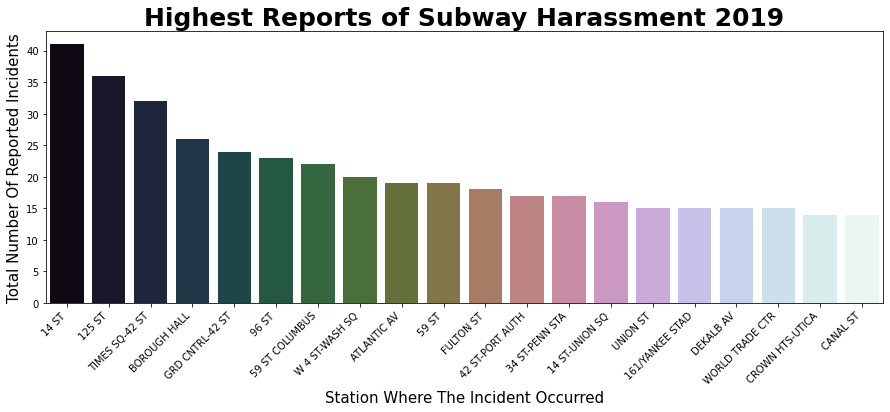

In [119]:
xx = highest_crime[highest_crime['cmplnt_num'] >= 8]

x = list(xx.station_name.head(20))
y = list(xx.cmplnt_num.head(20))

y_pos = np.arange(len(x))

plt.figure(figsize=(15,5))
sns.barplot(x,y, palette = 'cubehelix')
plt.title('Highest Reports of Subway Harassment 2019',fontweight='bold', fontsize = 25)
plt.xlabel('Station Where The Incident Occurred',fontsize = 15)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total Number Of Reported Incidents', fontsize = 15);

In [ ]:
xx = highest_crime[highest_crime['cmplnt_num'] >= 8]

x = list(xx.station_name.head(20))
y = list(xx.cmplnt_num.head(20))

y_pos = np.arange(len(x))

plt.figure(figsize=(15,5))
sns.barplot(x,y, palette = 'cubehelix')
plt.title('Highest Reports of Subway Harassment 2019',fontweight='bold', fontsize = 25)
plt.xlabel('Station Where The Incident Occurred',fontsize = 15)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total Number Of Reported Incidents', fontsize = 15);

In [132]:
station_totals.head(3)

,station,daily_entries,daily_exits,daily_foot_traffic
0,34 ST-PENN STA,55711889.0,51786472.0,107498361.0
1,GRD CNTRL-42 ST,49825559.0,43419815.0,93245374.0
2,34 ST-HERALD SQ,40301272.0,37061376.0,77362648.0


In [134]:
station_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station             379 non-null    object 
 1   daily_entries       379 non-null    float64
 2   daily_exits         379 non-null    float64
 3   daily_foot_traffic  379 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.0+ KB


In [135]:
station_totals.station.nunique()

379

In [126]:
most_trafficked = station_totals.sort_values('daily_foot_traffic',ascending = False).head(20)

In [127]:
most_trafficked_station = list(most_trafficked['station'])

In [128]:
most_trafficked_nums = list(most_trafficked['daily_foot_traffic'])

In [129]:
most_trafficked_station

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 '42 ST-PORT AUTH',
 'FULTON ST',
 'PATH NEW WTC',
 '86 ST',
 'CANAL ST',
 '125 ST',
 '59 ST COLUMBUS',
 '59 ST',
 '47-50 STS ROCK',
 '14 ST',
 '96 ST',
 'FLUSHING-MAIN',
 '72 ST',
 'CHAMBERS ST']

In [130]:
most_trafficked_nums

[107498361.0,
 93245374.0,
 77362648.0,
 68495993.0,
 63676986.0,
 63010294.0,
 60209390.0,
 56916827.0,
 55781315.0,
 54807951.0,
 47708260.0,
 46590125.0,
 43038713.0,
 39902977.0,
 39418499.0,
 37877620.0,
 36041750.0,
 33975748.0,
 32676576.0,
 32453365.0]

In [2]:


x = most_trafficked_station
y = most_trafficked_nums

y_pos = np.arange(len(x))

plt.figure(figsize=(10,5))
ax = sns.barplot(x,y, palette = 'cubehelix')
plt.title('Stations with the Highest Foot Traffic in 2019',fontweight='bold', fontsize = 15)
plt.xlabel('Station',fontsize = 10)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total Foot Traffic in Millions', fontsize = 10)
plt.yticks(ticks=[0,20000000,40000000,60000000,80000000,100000000],labels=[0,20,40,60,80,100]);

NameError: name 'most_trafficked_station' is not defined

In [157]:
least_trafficked = station_totals.sort_values('daily_foot_traffic',ascending = True).head(20)
least_trafficked_station = list(least_trafficked['station'])
least_trafficked_nums = list(least_trafficked['daily_foot_traffic'])

In [158]:
least_trafficked_nums

[10969.0,
 121747.0,
 191777.0,
 216086.0,
 336421.0,
 520065.0,
 606391.0,
 637817.0,
 650107.0,
 666505.0,
 685397.0,
 688797.0,
 693953.0,
 722004.0,
 794031.0,
 851903.0,
 864464.0,
 946742.0,
 1014912.0,
 1058322.0]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


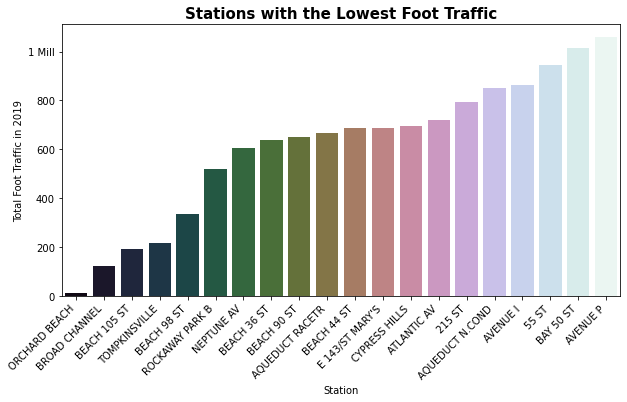

In [161]:
x = least_trafficked_station
y = least_trafficked_nums

y_pos = np.arange(len(x))

plt.figure(figsize=(10,5))
sns.barplot(x,y, palette = 'cubehelix')
plt.title('Stations with the Lowest Foot Traffic',fontweight='bold', fontsize = 15)
plt.xlabel('Station',fontsize = 10)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total Foot Traffic in 2019', fontsize = 10)
plt.yticks(ticks=[0,200000,400000,600000,800000,1000000],labels=[0,200,400,600,800,'1 Mill']);

In [162]:
least_trafficked_station

['ORCHARD BEACH',
 'BROAD CHANNEL',
 'BEACH 105 ST',
 'TOMPKINSVILLE',
 'BEACH 98 ST',
 'ROCKAWAY PARK B',
 'NEPTUNE AV',
 'BEACH 36 ST',
 'BEACH 90 ST',
 'AQUEDUCT RACETR',
 'BEACH 44 ST',
 "E 143/ST MARY'S",
 'CYPRESS HILLS',
 'ATLANTIC AV',
 '215 ST',
 'AQUEDUCT N.COND',
 'AVENUE I',
 '55 ST',
 'BAY 50 ST',
 'AVENUE P']

In [164]:
least_trafficked_nums

[10969.0,
 121747.0,
 191777.0,
 216086.0,
 336421.0,
 520065.0,
 606391.0,
 637817.0,
 650107.0,
 666505.0,
 685397.0,
 688797.0,
 693953.0,
 722004.0,
 794031.0,
 851903.0,
 864464.0,
 946742.0,
 1014912.0,
 1058322.0]

In [165]:
#reference other notebook
#get correlation of foot traffick and crime

In [168]:
station_totals.head()
#daily_foot_traffic here is the total for that station for the year

,station,daily_entries,daily_exits,daily_foot_traffic
0,34 ST-PENN STA,55711889.0,51786472.0,107498361.0
1,GRD CNTRL-42 ST,49825559.0,43419815.0,93245374.0
2,34 ST-HERALD SQ,40301272.0,37061376.0,77362648.0
3,23 ST,40020826.0,28475167.0,68495993.0
4,14 ST-UNION SQ,33491853.0,30185133.0,63676986.0


In [180]:
len(station_totals)

379

In [171]:
harassment_df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name,cmplnt_fr_date_time
0,101169135,08/04/2019,17:00:00,,,14,PATROL BORO MAN SOUTH,42 ST-PORT AUTH,2019-08-04 17:00:00
1,101774890,08/23/2019,07:58:00,08/23/2019,08:00:00,78,PATROL BORO BKLYN SOUTH,7 AV,2019-08-23 07:58:00
2,101834251,05/01/2019,06:30:00,05/01/2019,07:00:00,101,PATROL BORO QUEENS SOUTH,BEACH 44 ST,2019-05-01 06:30:00
3,104128001,09/17/2019,07:15:00,09/17/2019,07:20:00,107,PATROL BORO QUEENS SOUTH,169 ST,2019-09-17 07:15:00
4,105170512,06/18/2019,14:25:00,06/18/2019,14:30:00,68,PATROL BORO BKLYN SOUTH,BAY RIDGE AV,2019-06-18 14:25:00


In [173]:
harassment_df_totals = harassment_df.copy()

In [174]:
harassment_df_totals['yearly_station_crime'] = harassment_df_totals.groupby('station_name').cmplnt_num.transform(lambda x: x.count())

In [176]:
harassment_df_totals.sort_values('yearly_station_crime',ascending=False,inplace=True)

In [177]:
harassment_df_totals.drop_duplicates(subset=["station_name"], inplace=True)

In [179]:
len(harassment_df_totals)

268

In [ ]:
station_totals['crime_total'] = 